In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [9]:
url=pd.read_csv('urls.csv')


In [11]:
url.columns

Index(['Unnamed: 0', 'Domain', 'Have_IP', 'Have_At', 'URL_Length', 'URL_Depth',
       'Redirection', 'https_Domain', 'TinyURL', 'Prefix/Suffix', 'DNS_Record',
       'Domain_Age', 'Domain_End', 'iFrame', 'Mouse_Over', 'Right_Click',
       'Web_Forwards', 'Label'],
      dtype='object')

In [13]:
x=url.drop(columns=['Unnamed: 0','Domain','Label']).values

In [15]:
y=url['Label'].values

In [21]:
x

array([[0, 0, 0, ..., 1, 1, 1],
       [0, 0, 1, ..., 1, 1, 1],
       [0, 0, 0, ..., 1, 1, 1],
       ...,
       [0, 0, 0, ..., 1, 1, 1],
       [0, 0, 1, ..., 1, 1, 0],
       [0, 0, 1, ..., 1, 1, 1]], dtype=int64)

In [23]:
y

array([1, 0, 1, ..., 1, 0, 0], dtype=int64)

In [41]:
from sklearn.model_selection import *
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=42)

In [43]:
len(y_train)

1340

In [45]:

len(y_test)

660

In [47]:
from sklearn.svm import SVC
from sklearn.metrics import *
model=SVC()
model.fit(x_train,y_train)
pred=model.predict(x_test)
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94       332
           1       0.97      0.89      0.93       328

    accuracy                           0.93       660
   macro avg       0.94      0.93      0.93       660
weighted avg       0.94      0.93      0.93       660



In [51]:
param_grid={'C':[0.01,0.1,1,10,100],
            'gamma':[1,0.1,0.01,0.001,0.0001],
            'kernel':['rbf']}
grid=GridSearchCV(SVC(),param_grid,cv=5)
grid.fit(x_train,y_train)
print(grid.best_params_)

{'C': 1, 'gamma': 1, 'kernel': 'rbf'}


In [53]:
model=SVC(C=1,gamma=1,kernel='rbf')
model.fit(x_train,y_train)
pred=model.predict(x_test)
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96       332
           1       0.97      0.95      0.96       328

    accuracy                           0.96       660
   macro avg       0.96      0.96      0.96       660
weighted avg       0.96      0.96      0.96       660



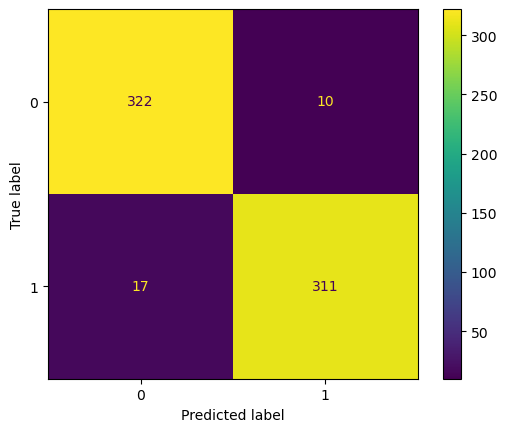

<Figure size 400x500 with 0 Axes>

In [59]:
cnf=confusion_matrix(y_test,pred)
ConfusionMatrixDisplay(confusion_matrix=cnf,display_labels=[0,1]).plot()
plt.figure(figsize=(4,5))
plt.show()